In [ ]:
 # pip install pymysql pandas SQLAlchemy
import warnings
warnings.filterwarnings('ignore')

1) Use Label Encoder instead of get_dummies in this code dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True) dataset

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you already have your dataset loaded
dataset = pd.read_excel('/Users/rehas./BIA LECTURES NOTES/ML/Housing.xlsx')
 # Example loading a dataset

# List of columns to encode
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                     'airconditioning', 'prefarea', 'furnishingstatus']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    dataset[col] = le.fit_transform(dataset[col])

# Display the transformed dataset
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


3) Apply Linear Regression in Car price prediction dataset [ EDA & Visualization]

In [4]:
# Let's first load the CSV file to examine its contents.
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/Users/rehas./BIA LECTURES NOTES/ML/car data .xlsx')

# Display the first few rows of the dataset to understand its structure
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
missing_values = dataset.isnull().sum()

In [9]:
summary_stats = dataset.describe()


In [11]:
print(dataset.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


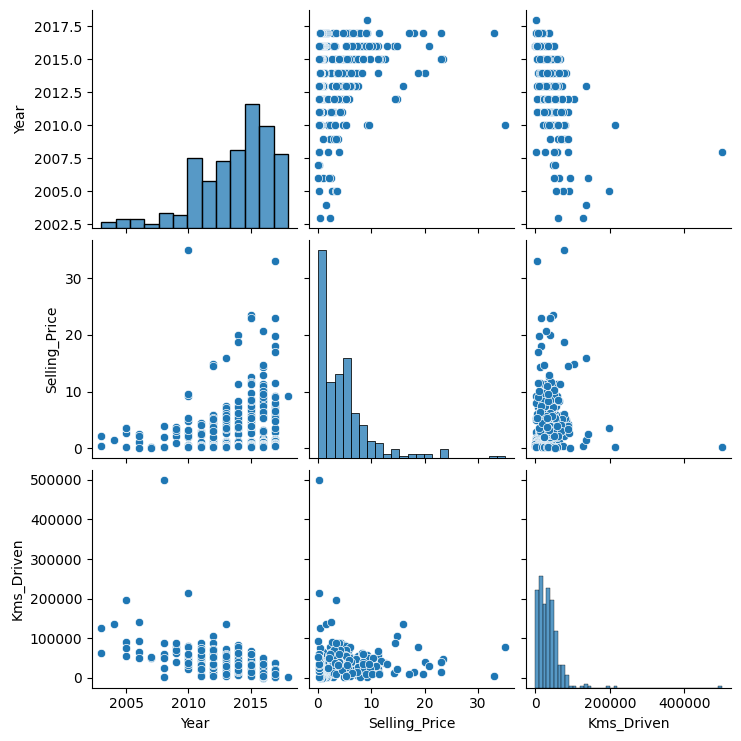

In [12]:
sns.pairplot(dataset[['Car_Name',  'Year', 'Selling_Price','Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']])
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to the categorical columns
dataset['Fuel_Type'] = le.fit_transform(dataset['Fuel_Type'])
dataset['Seller_Type'] = le.fit_transform(dataset['Seller_Type'])
dataset['Transmission'] = le.fit_transform(dataset['Transmission'])


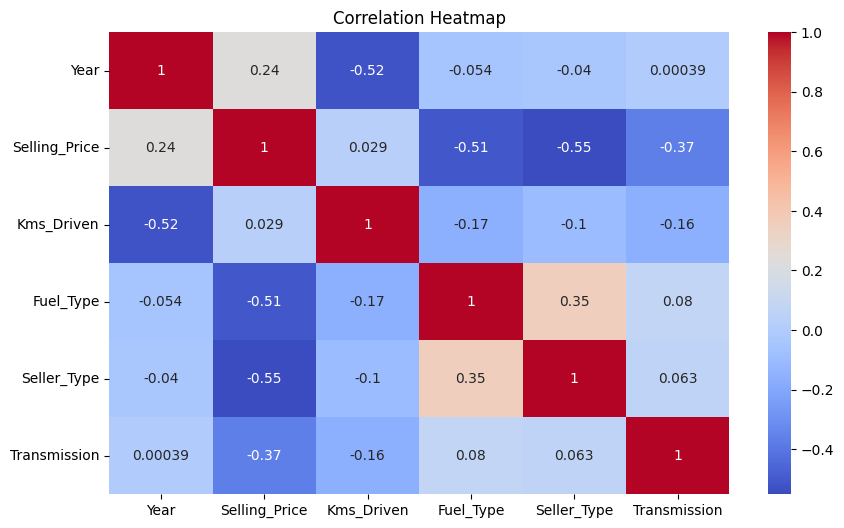

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()



In [14]:
missing_values, summary_stats

(Car_Name         0
 Year             0
 Selling_Price    0
 Present_Price    0
 Kms_Driven       0
 Fuel_Type        0
 Seller_Type      0
 Transmission     0
 Owner            0
 dtype: int64,
               Year  Selling_Price  Present_Price     Kms_Driven       Owner
 count   301.000000     301.000000     301.000000     301.000000  301.000000
 mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
 std       2.891554       5.082812       8.644115   38886.883882    0.247915
 min    2003.000000       0.100000       0.320000     500.000000    0.000000
 25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
 50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
 75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
 max    2018.000000      35.000000      92.600000  500000.000000    3.000000)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# List of categorical columns to one-hot encode
categorical_columns = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

# Apply OneHotEncoder to these columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply LabelEncoder to the column 'Car_Name' or any other categorical column
dataset['Car_Name'] = le.fit_transform(dataset['Car_Name'])


In [25]:
# 1. Define feature matrix X and target vector y
X = dataset.drop('Selling_Price', axis=1)  # Assuming 'Selling_Price' is the target
y = dataset['Selling_Price']

# 2. Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = lr_model.predict(X_test)


In [28]:
X = dataset.drop('Present_Price', axis=1)
y = dataset['Present_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr_model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [31]:
rmse

3.2113554815008714